# **Introduction to Prompt Engineering**

## What is Prompt Engineering?
Prompt Engineering is a practice that involves formulating questions and statements to effectively communicate with AI, specifically Large Language Models (LLMs). It's a blend of analytical thinking and creativity, essential for translating human intentions into a language that AI can process and respond to accurately. This skill is important across a variety of AI applications, from automating creative tasks to enhancing technical analyses, ensuring that the AI's responses are as relevant and useful as possible.

## Connection to Linguistics
Linguistics is the study of language which plays a key role in prompt engineering. Understanding the nuances of language and how it is used in different contexts is crucial for crafting effective prompts. Additionally, knowing how to use grammar and language structure that is universally used will result in the AI system returning back the most accurate results.

## Harnessing LLMs Through Prompt Engineering
LLMs are trained on vast amounts of text data, learning patterns, grammar, and knowledge from this data. However, despite their extensive training, LLMs do not inherently understand the specific goals or context of a user's query. Prompt engineering bridges this gap by crafting prompts that effectively communicate the user's intent to the model. By aligning the prompt with the model's learned patterns and knowledge, users can guide the model to apply its training in a way that addresses the specific task at hand.

The functionality of LLMs extends across a wide range of applications, from text completion and translation to question answering and content generation. Prompt engineering directly influences this functionality by specifying how the model should approach a task. For instance, by using specific prompt formats (e.g., "Explain like I'm five" for simplification tasks or including keywords for content generation), users can tailor the model's outputs to fit precise needs, leveraging the model's capabilities in a directed and efficient manner.

#### **Note: rerunning the cells in this notebook may cause the output to vary.**
#### **Note: the content of this notebook is adapted/borrowed from the [Prompt Engineering Guide](https://www.promptingguide.ai/).**

#### **If you find this content helpful, please continue to learn more at https://www.promptingguide.ai/.**

# **Installation**

### Local models
Ollama is a open-source platform for running LLMs locally on your device. For more information on available models and a direct download link, please refer to this: https://www.ollama.com/ 


**TODO**: First, follow this link to install Ollama on your operating system: https://www.ollama.com/

In [1]:
# This can help with installation on MacOS
import os
os.environ["HNSWLIB_NO_NATIVE"] = "1"  

In [116]:
!pip --quiet install matplotlib

In [2]:
# install dependencies
!pip --quiet install torch langchain langchain_core crewai crewai_tools ollama openai pyautogen

In [1]:
# We pull a model of our choice from the terminal for use in Ollama. In this tutorial, we will be using Meta's Llama3 model.
import ollama
!ollama pull llama3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c... 100% ▕████████████████▏  110 B                         
pulling 3f8eb4da87fa... 100% ▕████████████████▏  485 B                         
verifying sha256 digest 
writing manifest 
removing any unused layers 
success 


In [2]:
# Make a function to query the LLM that will be used throughout the notebook
def query_llm(prompt: str, model: str = 'llama3') -> str:
    """Query an LLM with a prompt.

    Parameters
    ----------
    prompt: str
        The prompt to use.
    model: str
        The model to use (must be supported by ollama), Default: llama3.

    Returns
    -------
    str: The response from the LLM.
    """
    # Generate a response with the model
    response = ollama.chat(model=model, messages=[
      {
        'role': 'user',
        'content': prompt,
      },
    ])

    # Parse and return the response
    return response['message']['content']

# **Best Practices for Writing Prompts**
In the context of Large Language Models (LLMs), prompt engineering can be approached using the scientific method. The prompt is your hypothesis or question, and the model's response is the experimental outcome. Precision, clarity, and context are as crucial here as they are in formulating a scientific query. A well-crafted prompt leads to informative and accurate responses, much like a well-designed experiment leads to meaningful data.

Prompt engineering influences LLM output in several key ways:

**Clarity and Precision:** Clear and precise prompts help the model understand the exact nature of the request, leading to more accurate and focused responses.

**Context Setting:** A well-crafted prompt can provide context that guides the model to generate responses within a specific framework or perspective.

**Controlling Complexity:** The complexity of a prompt can be adjusted to match the desired level of detail in the response, from simple explanations to in-depth analyses.

**Creativity and Idea Generation:** Creative prompts can encourage the model to generate innovative ideas and perspectives, particularly useful in brainstorming and problem-solving scenarios.

# **Types of Prompts**

# 1. Getting started

Make sure you can run some basic examples using Ollama.

In [14]:
response = query_llm(prompt="The sky is")
print(response)

Blue!


In [65]:
response = query_llm(prompt="Write a limerick about trillion parameter consortium (TPC) Barcelona.")
print(response)

What a unique request!

Here's a limerick attempt:

In TPC Barcelona, so fine and so bright,
A consortium with trillions in sight.
They gathered with care,
To share knowledge to spare,
And make AI progress take flight tonight!


# 2. Text Summarization

Text Summarization is a natural language processing (NLP) task that involves condensing a lengthy text document into a shorter, more compact version while still retaining the most important information and meaning. The goal is to produce a summary that accurately represents the content of the original text in a concise form.

There are different approaches to text summarization, including extractive methods that identify and extract important sentences or phrases from the text, and abstractive methods that generate new text based on the content of the original text.

Source: https://paperswithcode.com/task/text-summarization

In [15]:
prompt = """Antibiotics are a type of medication used to treat bacterial infections. 
They work by either killing the bacteria or preventing them from reproducing, 
allowing the body's immune system to fight off the infection. Antibiotics are usually 
taken orally in the form of pills, capsules, or liquid solutions, or sometimes administered 
intravenously. They are not effective against viral infections, and using them inappropriately
can lead to antibiotic resistance. 

Explain the above in one sentence:"""

response = query_llm(prompt=prompt)
print(response)

Antibiotics are medications that target bacterial infections by killing or preventing bacteria reproduction, allowing the body's immune system to fight off the infection, but they are ineffective against viral infections and can contribute to antibiotic resistance when used improperly.


### **Exercise** 
Instruct the model to explain the paragraph in one sentence like "I am 5". Do you see any differences?

# 3. Question Answering

Question answering is an especially important task in scientific domains. 
A paper or set of papers on a given topic can automatically be analyzed to
answer a domain specific question.

Context obtained from here: https://www.nature.com/articles/d41586-023-00400-x

In [18]:
prompt = """Answer the question based on the context below. Keep the answer short and concise. 
Respond "Unsure about answer" if not sure about the answer.

Context: Teplizumab traces its roots to a New Jersey drug company called Ortho Pharmaceutical. 
There, scientists generated an early version of the antibody, dubbed OKT3. 
Originally sourced from mice, the molecule was able to bind to the surface of T cells and limit 
their cell-killing potential. In 1986, it was approved to help prevent organ rejection after 
kidney transplants, making it the first therapeutic antibody allowed for human use.

Question: What was OKT3 originally sourced from?

Answer:"""

response = query_llm(prompt=prompt)
print(response)

Mice


### **Exercise** 
Try to edit prompt and get the model to respond that it isn't sure about the answer.

# 4. Text Classification

Text classification is an NLP task helpful in applications like spam filtering or sentiment analysis.
A scientific application might involve classifying how relevant a paper is to a given research question
to assist in a literature review.

In [31]:
prompt = """In one word, classify the text into neutral, negative or positive.

Text: I think the food was okay.

Sentiment:"""

response = query_llm(prompt=prompt)
print(response)

Neutral


### **Exercise**
Modify the prompt to instruct the model to provide an explanation to the answer selected.

# 5. Role Playing

Role playing is a prompting technique which allows you to specifiy a persona for the LLM response. 
This can be helpeful in crafting the style and tone of the response.

See here for a curated list of papers and resources: https://github.com/Neph0s/awesome-llm-role-playing-with-persona

In [35]:
prompt = """The following is a conversation with an AI research assistant. The assistant tone is technical and scientific.

Human: Hello, who are you?
AI: Greetings! I am an AI research assistant. How can I help you today?
Human: Can you tell me about the creation of blackholes?
AI:"""

response = query_llm(prompt=prompt)
print(response)

A fascinating topic! Black holes are among the most extreme objects in the universe. The concept of a body so massive that not even light could escape its gravitational pull was first proposed by Karl Schwarzschild in 1916, during his work on Einstein's theory of general relativity.

In the early 1960s, David Finkelstein introduced the idea of an "event horizon," marking the boundary beyond which anything that crosses it is trapped by the black hole's gravity. This concept was further refined through the work of Stephen Hawking and others in the 1970s.

The formation of a black hole typically occurs when a massive star runs out of fuel, causing its core to collapse under its own gravity. If the mass of the collapsing star exceeds a certain threshold, known as the Tolman-Oppenheimer-Volkoff (TOV) limit, a singularity forms at the center, surrounded by an event horizon.

The TOV limit is approximately 2-3 times the mass of our sun, depending on the composition of the star. More massive s

### **Exercise**
Modify the prompt to instruct the model to keep AI responses concise and short.

# 6. Code Generation

Code generation allows a user to generate source code in a variety of programming languages (e.g., Python, C++) using natural language descriptions of the desired behavior. This can be very helpful for getting started with APIs or libraries which are easy to forget such as matplotlib for plotting.

For more information, see: [A Survey on Large Language Models for Code Generation (2024)](https://arxiv.org/abs/2406.00515)


In [67]:
prompt = """Please generate a Python function that determines if a number is even."""

response = query_llm(prompt=prompt)
print(response)

Here is a simple Python function that determines if a number is even:
```
def is_even(n):
    return n % 2 == 0
```
This function uses the modulo operator (`%`) to check if the remainder of dividing `n` by 2 is equal to 0. If it is, then `n` is even.

You can test this function with some examples:
```
print(is_even(4))  # True
print(is_even(3))  # False
print(is_even(10))  # True
print(is_even(11))  # False
```
I hope this helps! Let me know if you have any questions.


### **Exercise**
Modify the prompt to provide a basic pytest evaluation suite.

In [113]:
prompt = """Please generate a Python function which makes a scatter plot."""

response = query_llm(prompt=prompt)
print(response)

Here's an example of a simple function that creates a scatter plot using the `matplotlib` library in Python:

```python
import matplotlib.pyplot as plt
import numpy as np

def make_scatter_plot(x, y, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    """
    Create a scatter plot.

    Args:
        x (list or array): The x-coordinates of the points to be plotted.
        y (list or array): The y-coordinates of the points to be plotted.
        title (str, optional): The title of the plot. Defaults to 'Scatter Plot'.
        x_label (str, optional): The label for the x-axis. Defaults to 'X-axis'.
        y_label (str, optional): The label for the y-axis. Defaults to 'Y-axis'.

    Returns:
        None
    """
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Example usage:
x = np.random.rand(10)
y = np.random.rand(10)
make_scatter_plot(x, y)
```

In this example, the function `make_scatter_plot` takes in two lists 

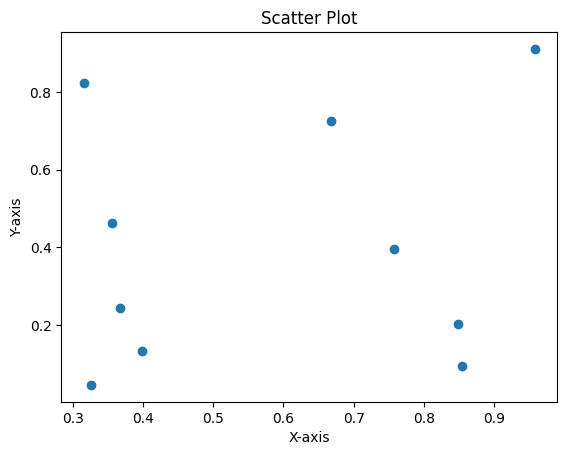

In [118]:
import matplotlib.pyplot as plt
import numpy as np

def make_scatter_plot(x, y, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    """
    Create a scatter plot.

    Args:
        x (list or array): The x-coordinates of the points to be plotted.
        y (list or array): The y-coordinates of the points to be plotted.
        title (str, optional): The title of the plot. Defaults to 'Scatter Plot'.
        x_label (str, optional): The label for the x-axis. Defaults to 'X-axis'.
        y_label (str, optional): The label for the y-axis. Defaults to 'Y-axis'.

    Returns:
        None
    """
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Example usage:
x = np.random.rand(10)
y = np.random.rand(10)
make_scatter_plot(x, y)

# 7. Reasoning

Reasoning tasks could include tasks such as mathematical reasoning, logical reasoning, causal reasoning, visual reasoning and more. 

[Sun et al. (2023)](https://arxiv.org/abs/2312.11562) recently proposed an overview of reasoning with foundation models which focuses on the latest advancements in various reasoning tasks, which they summarize in the following figure:

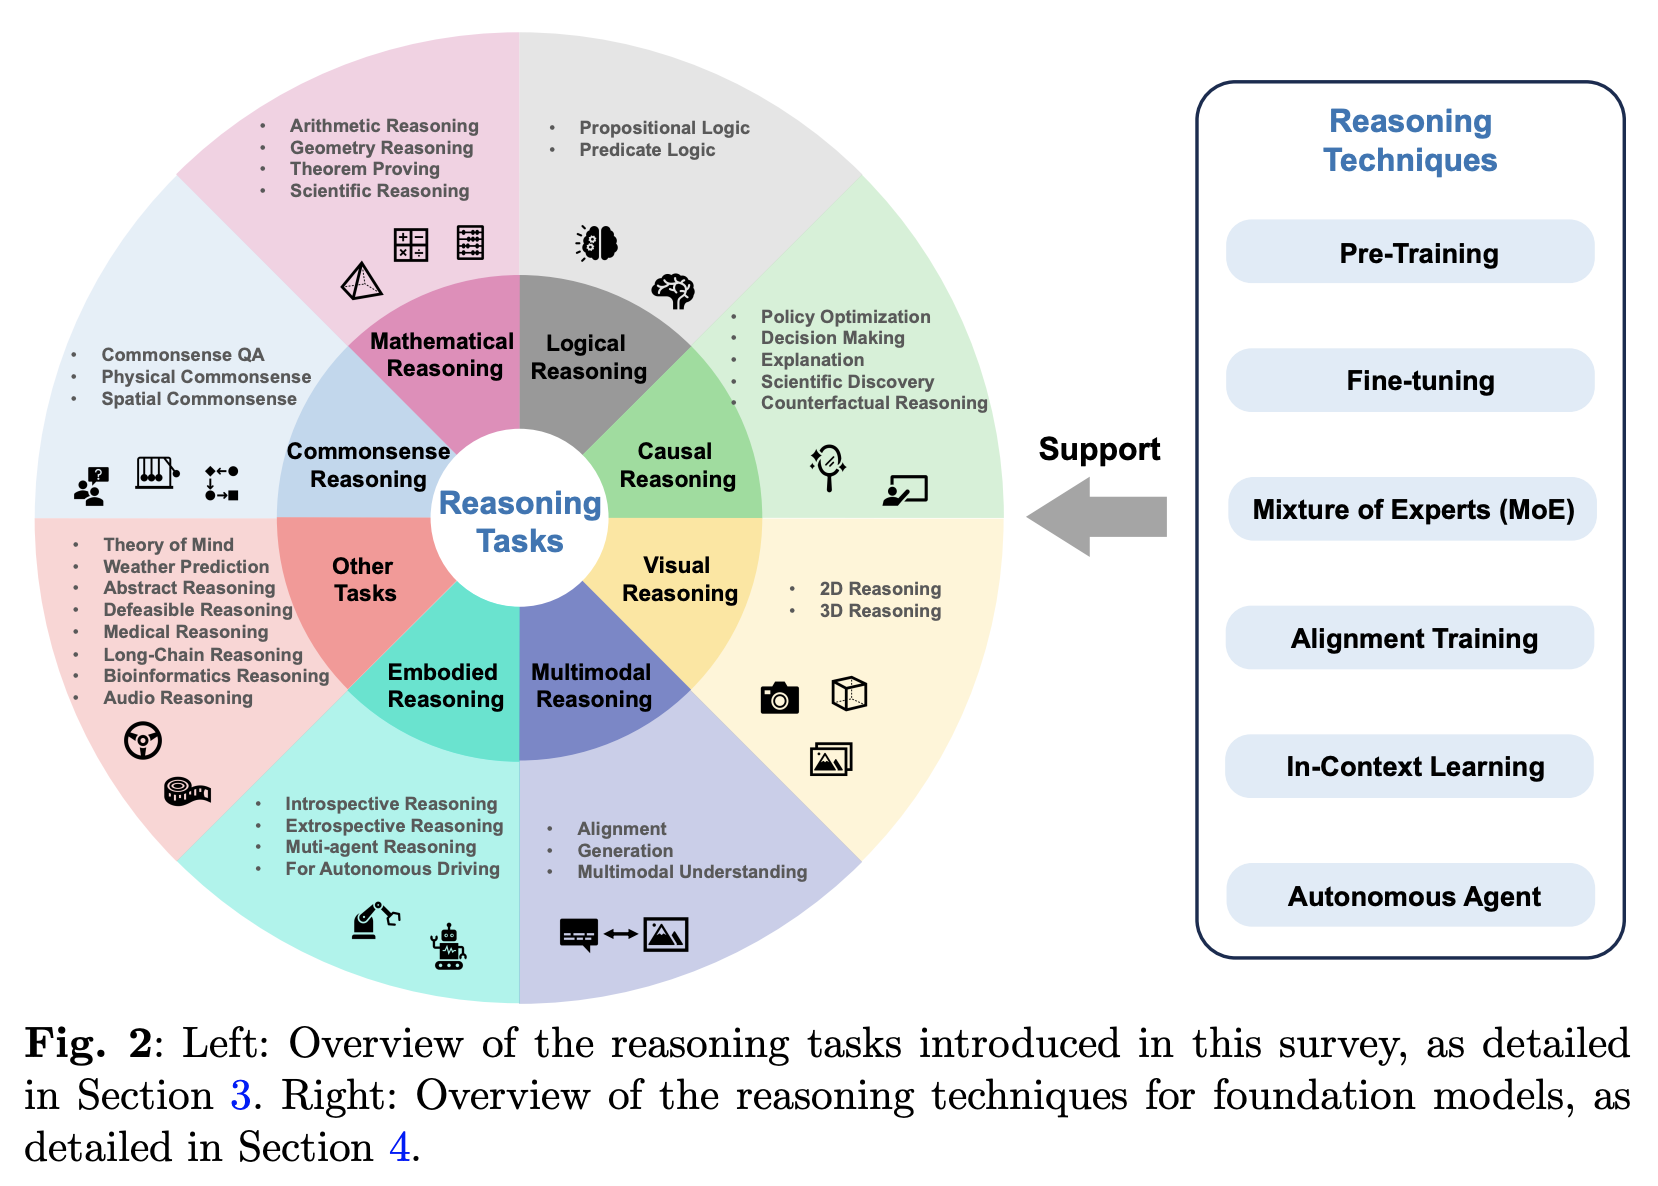

For more information: https://www.promptingguide.ai/research/llm-reasoning

### Zero-shot example

No additional context or examples are provided to help answer the question.

In [56]:
prompt = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 

In one word, is the statment true or false."""

response = query_llm(prompt=prompt)
print(response)

True.


**Note**: The correct answer is False. 
Simply asking for a one word answer may fail to produce the correct response. 
Let's try providing a set of reasoning steps to follow.

In [52]:
prompt = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 

Solve by breaking the problem into steps. First, identify the odd numbers, add them, and indicate whether the result is odd or even."""

response = query_llm(prompt=prompt)
print(response)

Let's break down the problem step by step:

Step 1: Identify the odd numbers in the group.

The odd numbers are: 15, 5, 13, 7, and 1.

Step 2: Add up the odd numbers.

15 + 5 = 20
20 + 13 = 33
33 + 7 = 40
40 + 1 = 41

So, the sum of the odd numbers is 41.

Step 3: Determine whether the result is odd or even.

The number 41 is an odd number.

Therefore, the statement "The odd numbers in this group add up to an even number" is actually FALSE.


### **Exercise**
Modify the prompt to solve the problem in a way that doesn't require summing the numbers.

# 8. Few-shot prompting

While large-language models demonstrate remarkable zero-shot capabilities, they still fall short on more complex tasks when using the zero-shot setting. Few-shot prompting can be used as a technique to enable in-context learning where we provide demonstrations in the prompt to steer the model to better performance. The demonstrations serve as conditioning for subsequent examples where we would like the model to generate a response.

According to [Touvron et al. 2023](https://arxiv.org/pdf/2302.13971) few shot properties first appeared when models were scaled to a sufficient size [(Kaplan et al., 2020)](https://arxiv.org/abs/2001.08361).

For more information: https://www.promptingguide.ai/techniques/fewshot

In [71]:
prompt = """
The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17, 10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16, 11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17, 9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:"""

response = query_llm(prompt=prompt)
print(response)

Let's find the sum of the odd numbers:

15 + 5 + 13 + 7 + 1 = 41

Since 41 is an odd number, the statement "The odd numbers in this group add up to an even number" is actually FALSE.

So, the correct answer is: A. False


### Remark

In contrast to the reasoning example presented in the previous section, few-shot prompting allows this problem to be solved without providing a strategy in the prompt. However, not all problems can be solved this way so more advanced prompting techniques are needed which we will see next.

# 9. Chain-of-Thought (CoT) Prompting

Introduced in [Wei et al. (2022)](https://arxiv.org/pdf/2201.11903), chain-of-thought (CoT) prompting enables more complex reasoning capabilities through intermediate reasoning steps. You can combine it with few-shot prompting to get better results on more complex tasks that require reasoning before responding.

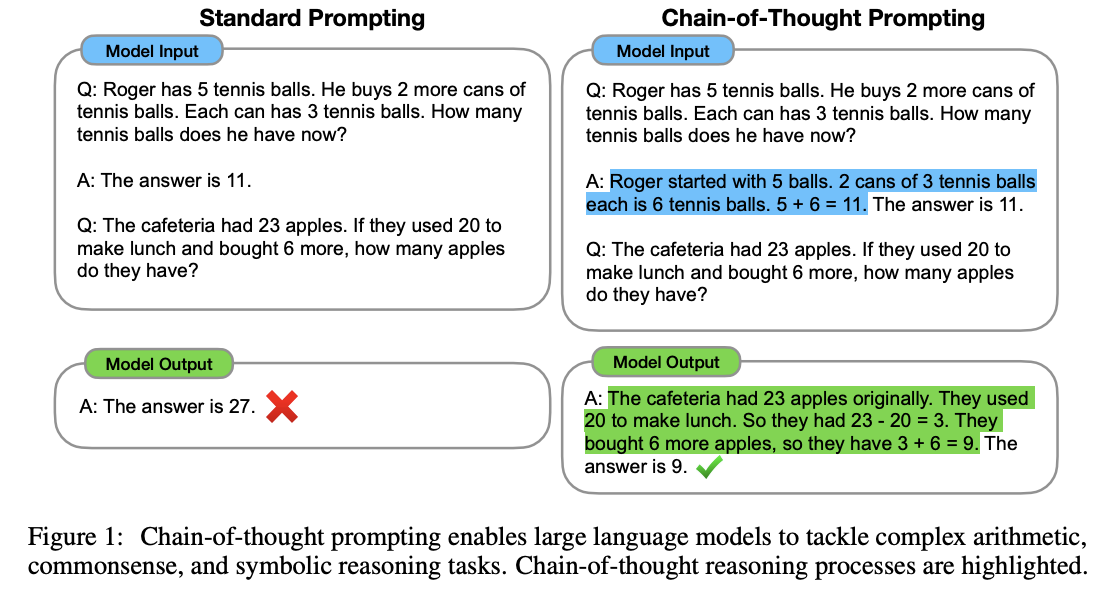

Let's try a simple problem and see how the model performs:

In [69]:
prompt = """Follow the format as specified to answer the question.

The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:"""

response = query_llm(prompt=prompt)
print(response)

Adding all the odd numbers (15, 5, 13, 7, 1) gives 41. The answer is False.


# 10. Zero-shot CoT

Introduced in [Kojima et al. (2022)](https://arxiv.org/abs/2205.11916), zero-shot CoT, essentially involves adding "Let's think step by step" to the original prompt. 

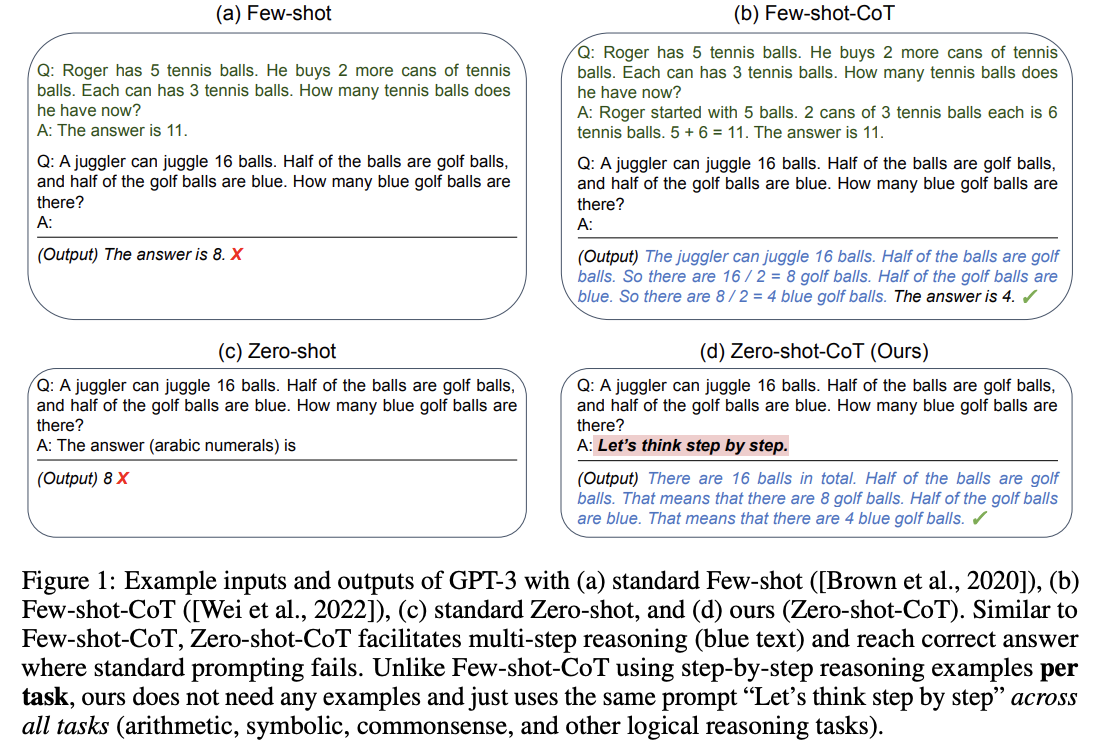

Let's try a simple problem and see how the model performs:

In [96]:
prompt = """
I went to the market and bought 10 apples.
I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1.
How many apples did I remain with?

Let's think step by step."""

response = query_llm(prompt=prompt)
print(response)

A great problem! Let's break it down step by step.

Initially, you had 10 apples.

You gave 2 apples to the neighbor, so you have:
10 - 2 = 8 apples left

Then, you gave 2 apples to the repairman, so you have:
8 - 2 = 6 apples left

Next, you bought 5 more apples. Now you have:
6 + 5 = 11 apples

But wait! You ate 1 apple. So, you're left with:
11 - 1 = 10 apples

So, in the end, you remain with... 10 apples!


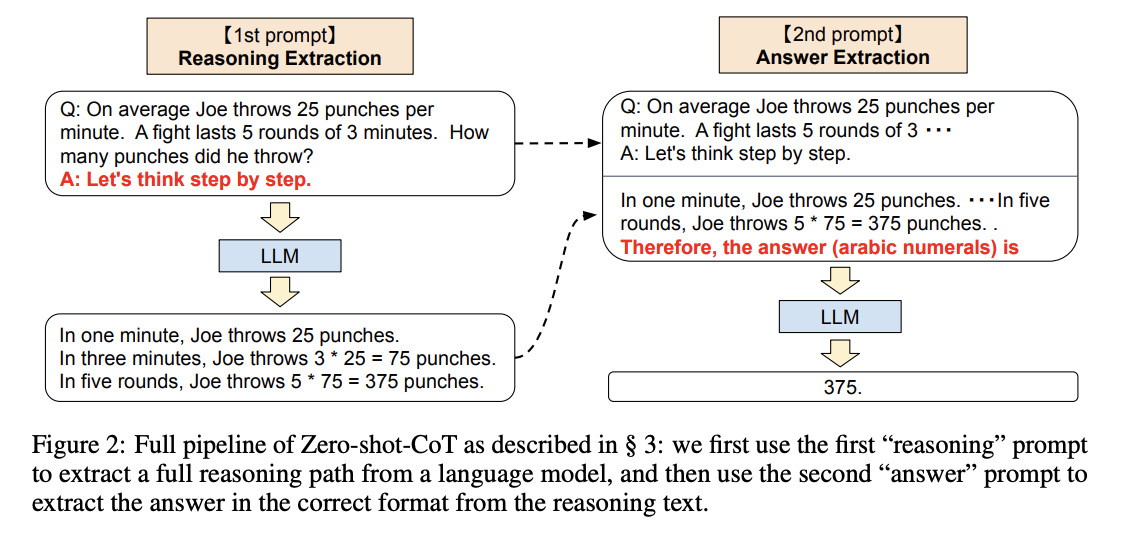

In [100]:
# Reasoning Extraction
prompt = """
Q: I went to the market and bought 10 apples. 
I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1. 
How many apples did I remain with?

A: Let's think step by step."""

response = query_llm(prompt=prompt)
print(f"Reasoning Extraction\n{'=' * 20}\n{response}")

# Answer Extraction
prompt = f"{response}\nTherefore, the answer (only using arabic numerals) is"

response = query_llm(prompt=prompt)
print(f"\nAnswer Extraction\n{'=' * 20}\n{response}")

Reasoning Extraction
Let's break it down!

You started with 10 apples.

You gave 2 apples to the neighbor, so you had:
10 - 2 = 8 apples left

Then, you gave 2 apples to the repairman, so you had:
8 - 2 = 6 apples left

Next, you bought 5 more apples, so you now have:
6 + 5 = 11 apples

But then, you ate 1 apple. So, you're left with:
11 - 1 = 10 apples

 Wait a minute... You said you started with 10 apples! That means you still have the original 10 apples you bought, and the extra ones you got don't change that.

So, to answer your question: You remain with the original 10 apples.

Answer Extraction
You're absolutely right!

10


# 11. Self-Consistency

Proposed by [Wang et al. (2022)](https://arxiv.org/pdf/2203.11171.pdf), self-consistency aims "to replace the naive greedy decoding used in chain-of-thought prompting". The idea is to sample multiple, diverse reasoning paths through few-shot CoT, and use the generations to select the most consistent answer. This helps to boost the performance of CoT prompting on tasks involving arithmetic and commonsense reasoning.


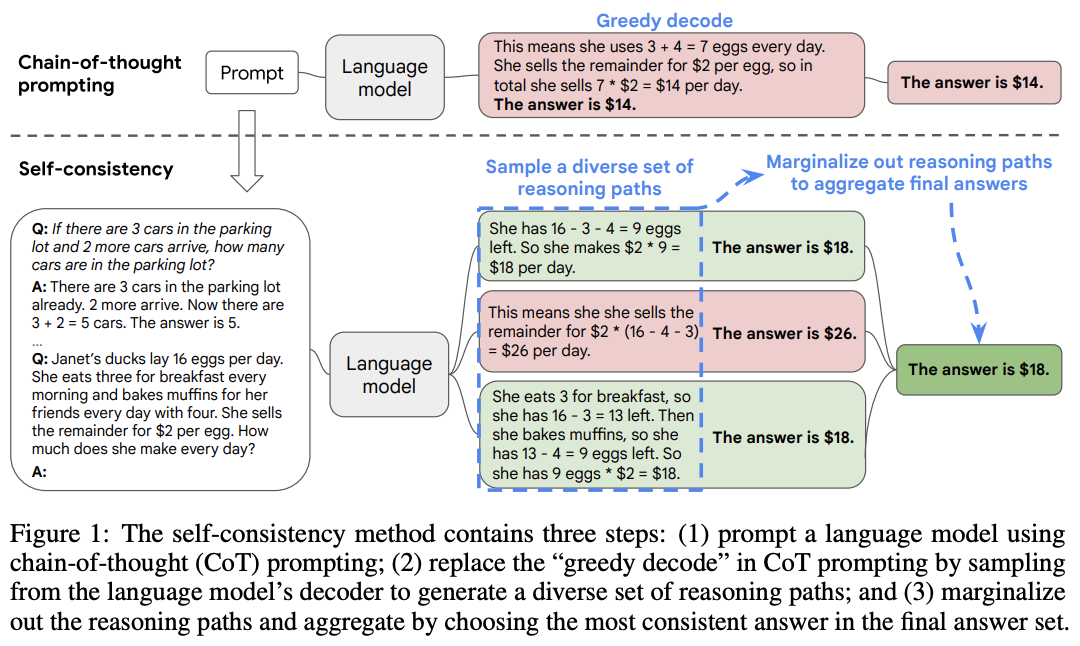

Let's try the following example for arithmetic reasoning:

In [85]:
prompt = """Below is an example of how to respond to Question/Answer pairs. Please answer the final question.

Q: There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done,
there will be 21 trees. How many trees did the grove workers plant today?
A: We start with 15 trees. Later we have 21 trees. The difference must be the number of trees they planted.
So, they must have planted 21 - 15 = 6 trees. The answer is 6.

Q: When I was 6 my sister was half my age. Now I’m 70 how old is my sister?
A:
"""

print(f"Response 1\n{'=' * 20}")
response = query_llm(prompt=prompt)
print(response)

print(f"\nResponse 2\n{'=' * 20}")
response = query_llm(prompt=prompt)
print(response)

print(f"\nResponse 3\n{'=' * 20}")
response = query_llm(prompt=prompt)
print(response)

Response 1
Let's start with the situation when you were 6 and your sister was half your age. Since you're 6, your sister must be 3 (since half of 6 is 3). 

Now, fast-forward to the present when you're 70. If your sister was 3 years younger than you then, she's now 67 years old (since 70 - 3 = 67). The answer is 67.

Response 2
When you were 6, your sister was half your age, so she was 3 years old (since you're even numbers and it's the simplest way to make sense of this problem).

Now you're 70, which means you've aged 64 years since then. To find out how old your sister is now, you subtract the number of years that have passed from her original age:

Her original age was 3.
You've aged 64 years, so she's aged 64 years too.

So, my sister is now 67 years old.

Response 3
Let's work it out!

When you were 6 years old, your sister was half your age, which means she was 6/2 = 3 years old.

Now, you're 70 years old, and we want to find your sister's current age. Since her original age was

### **Note**
Computing the final answer involves a few steps (check out the paper for the details) but for the sake of simplicity, we can see that there is already a majority answer emerging so that would essentially become the final answer.

# 12. Generated Knowledge Prompting

LLMs continue to be improved and one popular technique includes the ability to incorporate knowledge or information to help the model make more accurate predictions.

Using a similar idea, can the model also be used to generate knowledge before making a prediction? That's what is attempted in the paper by [Liu et al. 2022](https://arxiv.org/pdf/2110.08387) -- generate knowledge to be used as part of the prompt. In particular, how helpful is this for tasks such as commonsense reasoning?

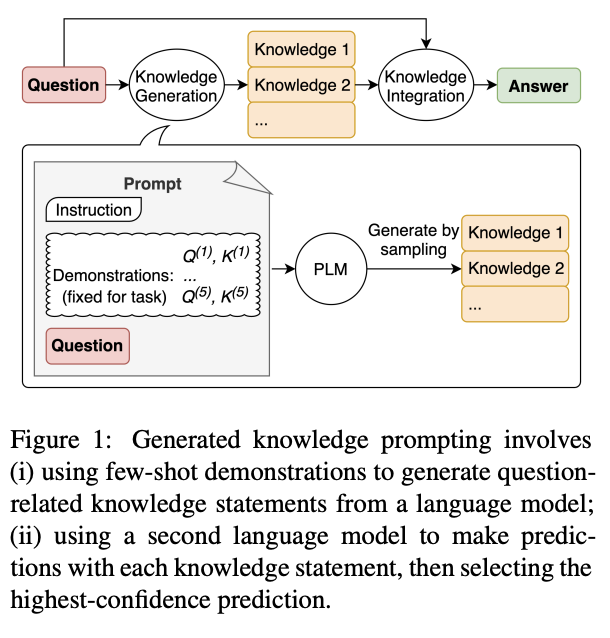



In [106]:
prompt = """Please provide knowledge about the final input statement.

Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.

Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.

Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.

Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.

Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).

Input: Part of golf is trying to get a higher point total than others.
Knowledge:"""

response = query_llm(prompt=prompt)
print(response)

A fun one!

Input: Part of golf is trying to get a higher point total than others.

Knowledge: Actually, the goal in golf is not to achieve a higher point total, but rather to score as low as possible. The objective is to hit each shot into the hole using the fewest number of strokes possible. The player with the lowest score at the end of the game or tournament wins.


In [107]:
prompt="""Question: Part of golf is trying to get a higher point total than others. Yes or No?

Knowledge: {response}

Explain and Answer:
""".format(response=response)

response2 = query_llm(prompt=prompt)
print(response2)

What a great question!

**Answer:** No!

According to the rules of golf, the goal is not to get a higher point total than others, but rather to achieve the lowest score possible. The objective is to complete each hole in the fewest number of strokes (hits) possible. The player with the lowest score at the end of the game or tournament wins.

**Explanation:** In golf, points are not awarded for individual shots; instead, players earn a score by counting the total number of strokes taken to complete each hole. The goal is to minimize this score by hitting each shot accurately and efficiently. This means that the better you play, the lower your score will be, which is exactly opposite of trying to get a higher point total than others!


# 13. Tree-of-Thought

Tree of Thought involves exploring multiple branches or paths of reasoning from a single starting point. This concept can be visualized like a tree, where each branch represents a different line of reasoning or a different aspect of a problem to explore. Unlike the linear progression in Chain of Thought, Tree of Thought allows for a more expansive exploration of possibilities, considering multiple outcomes or perspectives simultaneously.

For complex tasks that require exploration or strategic lookahead, traditional or simple prompting techniques fall short. [Yao et el. (2023)](https://arxiv.org/abs/2305.10601) and [Long (2023)](https://arxiv.org/abs/2305.08291) recently proposed Tree of Thoughts (ToT), a framework that generalizes over chain-of-thought prompting and encourages exploration over thoughts that serve as intermediate steps for general problem solving with language models.

ToT maintains a tree of thoughts, where thoughts represent coherent language sequences that serve as intermediate steps toward solving a problem. This approach enables an LM to self-evaluate the progress through intermediate thoughts made towards solving a problem through a deliberate reasoning process. The LM's ability to generate and evaluate thoughts is then combined with search algorithms (e.g., breadth-first search and depth-first search) to enable systematic exploration of thoughts with lookahead and backtracking.

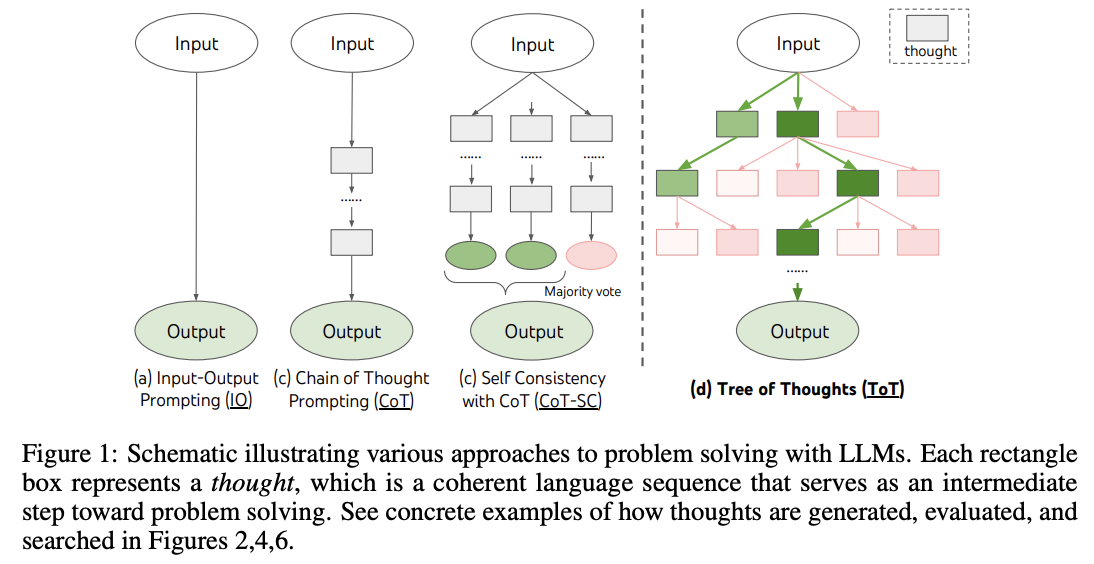

Image source: [Yao et el. (2023)](https://arxiv.org/abs/2305.10601)

From the results reported in the figure below, ToT substantially outperforms the other prompting methods:

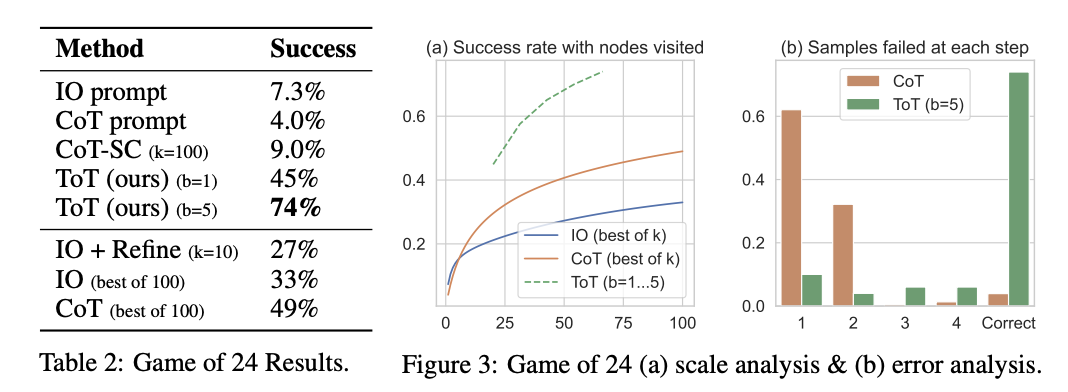

**Note**: description of `b`: the method maintains a set of the `b` most promising states per step.

Image source: [Yao et el. (2023)](https://arxiv.org/abs/2305.10601)

[Hulbert (2023)](https://github.com/dave1010/tree-of-thought-prompting) has proposed Tree-of-Thought Prompting, which applies the main concept from ToT frameworks as a simple prompting technique, getting the LLM to evaluate intermediate thoughts in a single prompt. A sample ToT prompt is:

In [7]:
# Question borrowed from: https://arxiv.org/pdf/2201.11903

prompt = """
Imagine three different experts are answering this question.
All experts will write down 1 step of their thinking,
then share it with the group.
Then all experts will write down the next step of their thinking, repeating this processs until they have reached a final answer.
If any expert realises they're wrong at any point then they leave.
The question is: There are 36 penguins sunbathing in the snow. One-third of them jump in and swim in the ocean.
Another one-third go inside the cave to eat their dinner. How many penguins are still left sunbathing?
"""

response = query_llm(prompt=prompt)
print(response)

Let's get started! Each expert will share one step of their thinking, then we'll repeat the process until they reach a final answer.

**Expert 1:**
Step 1: "There are 36 penguins initially, and one-third of them jump in and swim in the ocean. So, I'll calculate one-third of 36 first..."

(No sharing yet, as it's just Step 1)

**Expert 2:**
Step 1: "I'll start by identifying that there are two groups: those who go to the ocean and those who go into the cave. Let me think about this for a moment..."

(Not sharing anything yet, just thinking)

**Expert 3:**
Step 1: "Okay, let's focus on the number of penguins remaining in the snow. One-third went to the ocean, so I'll subtract that from the initial 36..."

(Sharing Step 1) "I think there are... 24 penguins left sunbathing initially."

Now it's time for each expert to share their Step 1 and then proceed to Step 2.

Do any experts realize they're wrong or want to leave?


#### ChatGPT output for the above prompt (June 2024)

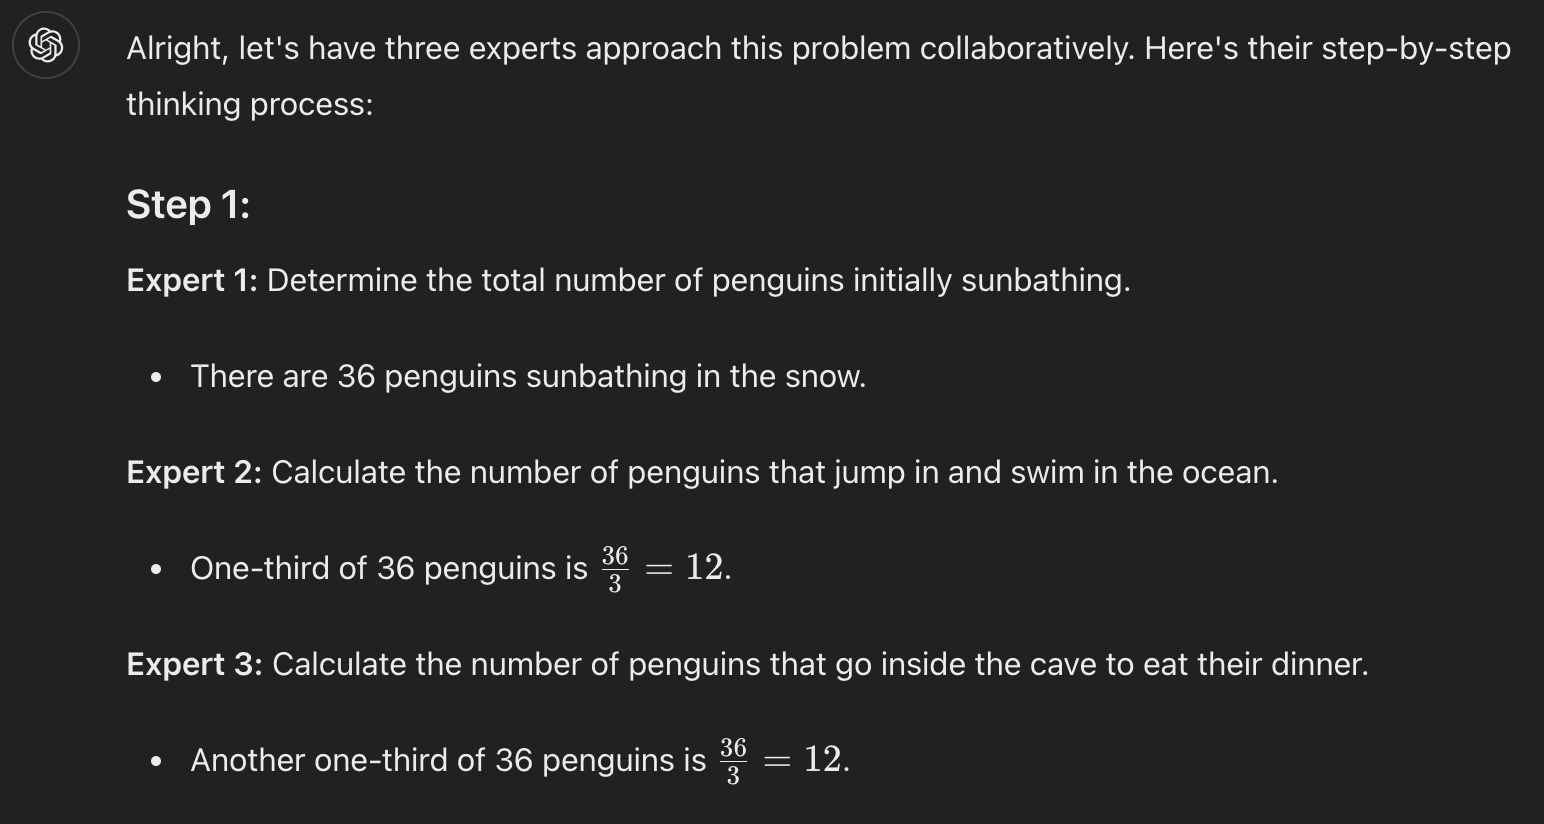

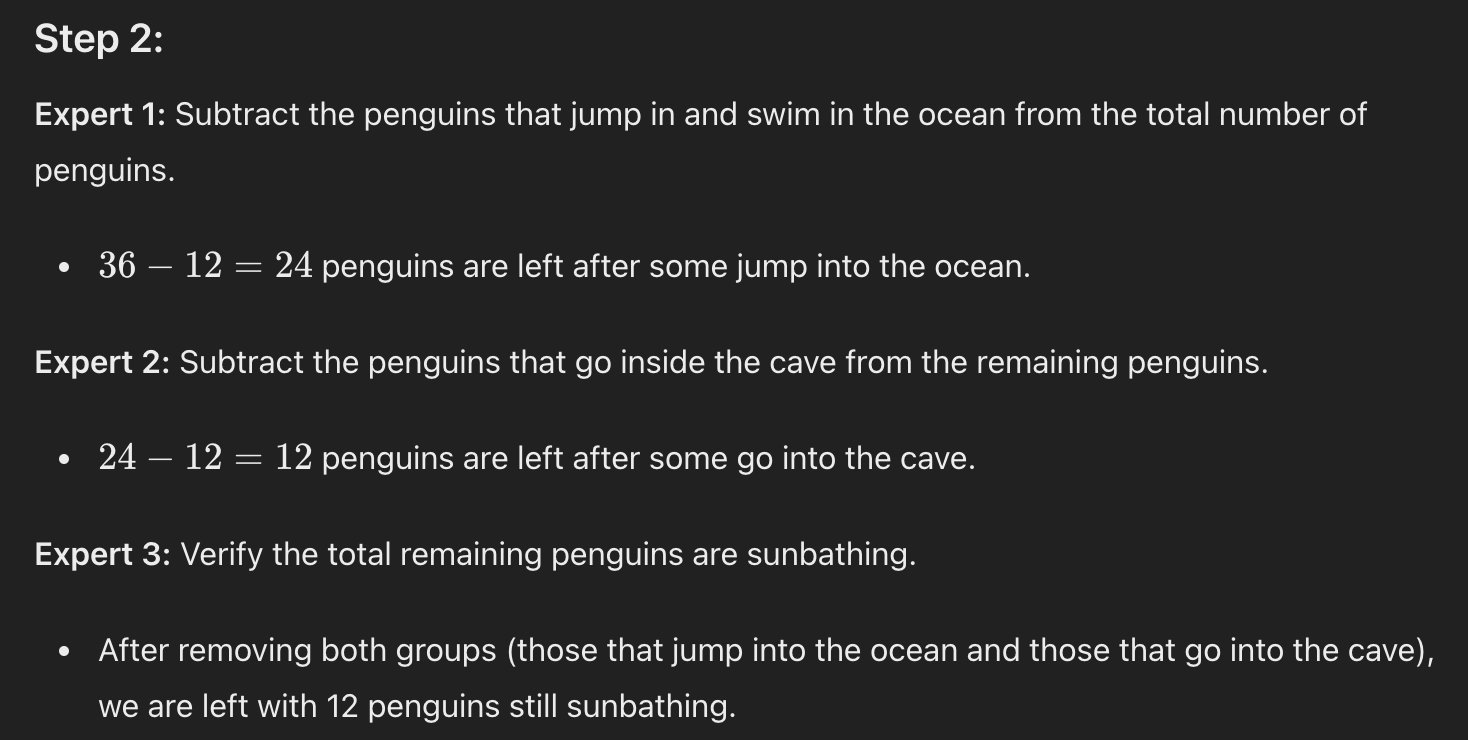

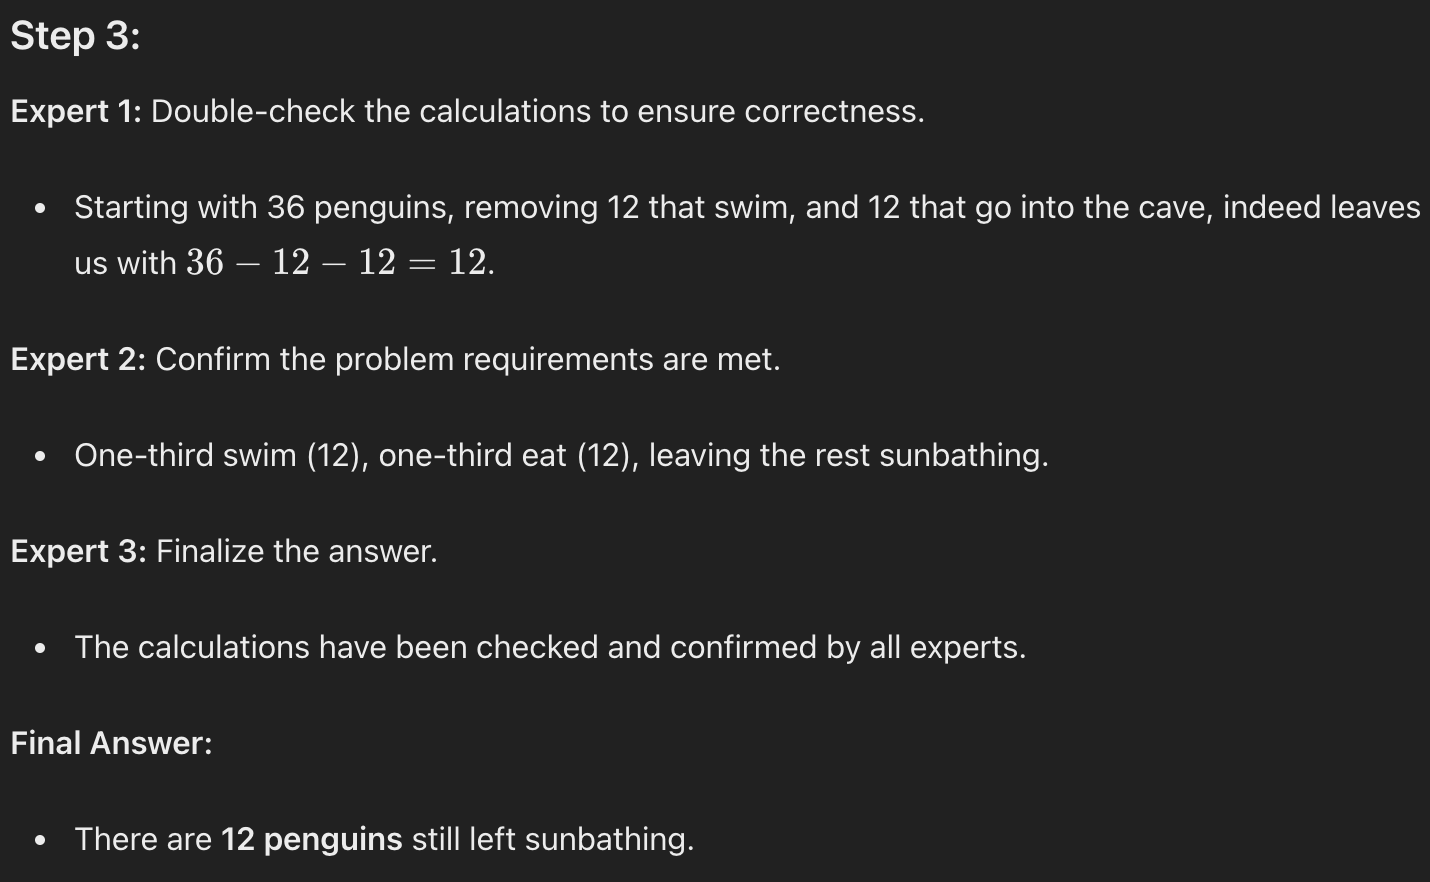


### Example 1: ToT on the Impact of Renewable Energy on Global Sustainability

**Scenario:** Evaluating the impact of renewable energy sources on global sustainability through the perspectives of technological innovation, policy development, and community engagement.

The response effectively demonstrates a **Tree of Thought (ToT)** approach by integrating diverse perspectives on renewable energy and sustainability. It combines insights from an engineer on **technological innovations**, a policy analyst on **regulatory impacts**, and a **community organizer** on grassroots movements. The synthesis of these perspectives emphasizes that global sustainability through renewable energy requires a multifaceted approach: technological advancements for efficiency and accessibility, supportive regulatory frameworks for promoting development and adoption, and active community organizing for widespread implementation. This example illustrates the ToT methodology's **strength in exploring and synthesizing multiple lines of inquiry, showcasing the complexity of addressing global challenges and the necessity of collaborative efforts across different sectors.**

In [8]:
# Define the question/topic for the Tree of Thought
question = "Explore the impact of renewable energy on global sustainability."

# Construct a complex ToT prompt
prompt = f'''Imagine three experts providing different perspectives on {question}:
1. An engineer focusing on technological innovations,
2. A policy analyst discussing regulatory impacts,
3. A community organizer highlighting grassroots movements.

Each expert presents their view, followed by a brief evaluation of the strengths and weaknesses of each perspective. 
Conclude with a synthesis of the most compelling elements from each to form a holistic answer.
'''

response = query_llm(prompt=prompt)
print(response)

Here are the perspectives of the three experts:

**Expert 1: Engineer - Technological Innovations**

"Renewable energy is revolutionizing the way we generate power. Advances in solar and wind technology have made them cost-competitive with fossil fuels, paving the way for widespread adoption. Battery storage innovations have also enabled grid-scale integration, making renewables a reliable source of energy. As engineers, we're excited to continue pushing the boundaries of what's possible, exploring new materials, and improving efficiency."

Strengths: Emphasizes the rapid progress in renewable technology and its potential to disrupt the energy industry.

Weaknesses: Overlooks the social and environmental implications of large-scale renewable infrastructure development and the need for policy support.

**Expert 2: Policy Analyst - Regulatory Impacts**

"While technological innovations are crucial, regulatory frameworks are equally important. Governments must set clear targets, provide i

# Conclusion

As reviewed in [A Systematic Survey of Prompt Engineering in Large Language Models:
Techniques and Applications](https://arxiv.org/pdf/2402.07927), there are many prompt engineering techniques--this field being an active area of research.

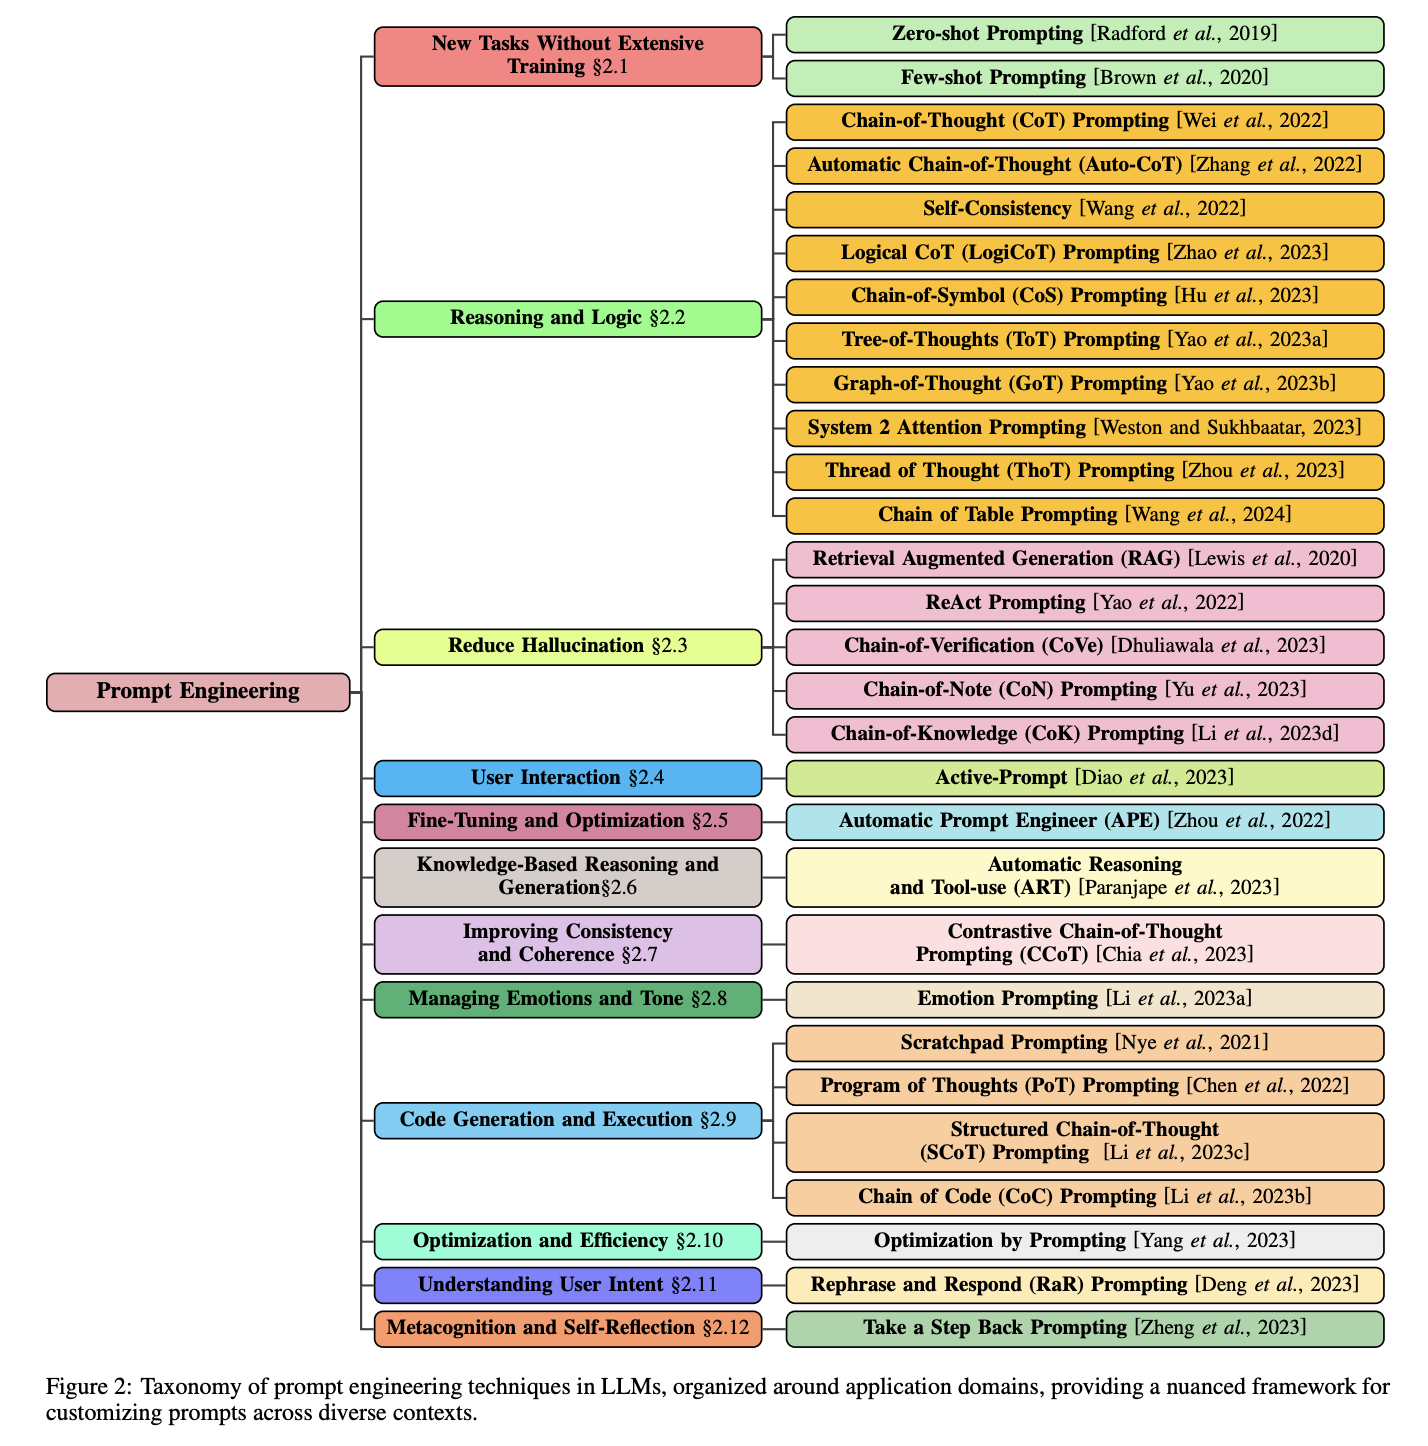


There are also techniques for automatically creating better prompts. Hand-crafted prompt-strategies are often sub-optimal. PromptBreeder [(Fernando et. al 2023)](https://arxiv.org/abs/2309.16797) proposes a general-purpose self-referential self-improvement mechanism that evolves and adapts prompts for a given domain.


Throughout this tutorial, we've introduced several foundamental techniques for prompt engineering which serve as a starting point for you to experiment, adapt, and discover new ways to communicate with and make effective use of AI.

Happy prompting!